In [17]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [18]:
X = 2 * np.random.rand(100, 1)
Y = 4 + 3 * X + np.random.rand(100, 1)

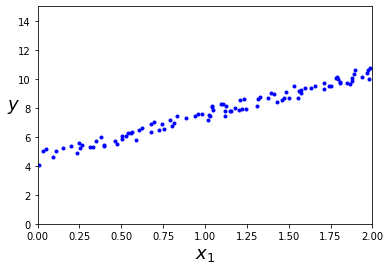

In [19]:
plt.plot(X, Y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [20]:
#정규 방정식을 사용한 선형회귀 접근

X_b = np.c_[np.ones((100,1)),X] # 1을 넣어주는게 b를 넣어주려고.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)
theta_best
# 세타가 4, 3 일것을 기대했지만 np.random.rand(100, 1)에 의한 가우시안 노이즈로 약간의 오차가 있다.

array([[4.57499194],
       [2.9373564 ]])

In [21]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)

y_predict # 새로운 X 0과 2 에 대해 정규방정식에 의한 파라미터로 예측하면 y값이 어떤것이 나올까 -> 노이즈 때문에 정확하지는 않음.

array([[ 4.57499194],
       [10.44970473]])

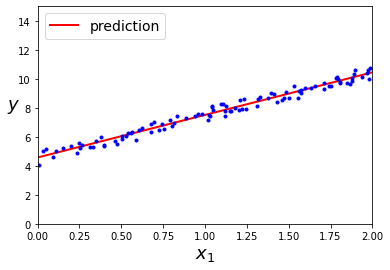

In [22]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="prediction")
plt.plot(X, Y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

# 실제 데이터들을 정규방정식으로 학습한 선형방정식이 얼마나 잘 맞추는지 가시화.

In [23]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, Y, rcond=1e6)

theta_best_svd # 최소제곱법을 이용해서 세타를 구해봄. (실제값과 예측값의 차이의 제곱합이 최소가되게.)

array([[4.57499194],
       [2.9373564 ]])

In [24]:
np.linalg.pinv(X_b).dot(Y)

# 행렬의 무어-펜로즈 유사역원 역행렬을 구한후 Y와 곱한다 -> 세타

array([[4.57499194],
       [2.9373564 ]])

In [25]:
#경사 하강법을 사용한 선형회귀 접근

eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.rand(2,1)
for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta)-Y) # 비용함수 mse의 풀배치 편도함수벡터 식
  theta = theta - eta * gradients

theta # 비용함수의 미분값을 가지고 있는 그래디언트를 구하고, 그래디언트를 토대로 세타를 갱신한다. (풀배치)

array([[4.57499194],
       [2.9373564 ]])

In [26]:
X_new_b.dot(theta) #정규방정식과 같은결과

array([[ 4.57499194],
       [10.44970473]])

In [27]:
theta_path_bgd = []
def plot_gradient_descent(theta, eta, theta_path=None):
  m = len(X_b)
  plt.plot(X, Y, "b.")
  n_iterations = 1000

  for iteration in range(n_iterations):
    if iteration < 10:
      y_predict = X_new_b.dot(theta)
      style = "b-" if iteration > 0 else "r--"
      plt.plot(X_new, y_predict, style)

    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - Y)
    theta = theta - eta * gradients

    if theta_path is not None:
      theta_path.append(theta)

  plt.xlabel("$x_1$", fontsize=18)
  plt.axis([0, 2, 0, 15])
  plt.title(r"$ eta = {}$".format(eta), fontsize=16)

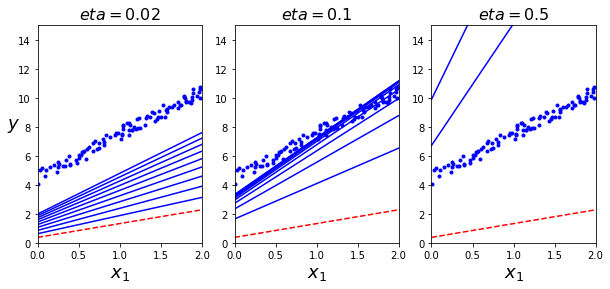

In [28]:
np.random.seed(42)
theta = np.random.rand(2,1)
plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

# eta 즉 학습률이 너무 낮으면 최적점에 도달하는데 너무 오래걸린다. (10번 안에 도달 못함)
# 반대로 너무 높으면 한번 반복할때마다 크게 뛰어 발산한다.

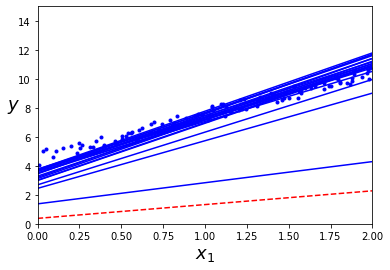

In [29]:
#스토캐스틱 경사 하강법 을 사용한 선형회귀 접근

theta_path_sgd = []
m = len(X_b)
np.random.seed(42)
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
  return t0 / (t+t1) # 이게 왜 이렇게?? -> 나중에 질문

theta = np.random.rand(2,1)

for epoch in range(n_epochs):
  for i in range(m):
    if epoch == 0 and i < 20:
      y_predict = X_new_b.dot(theta)           
      style = "b-" if i > 0 else "r--"
      plt.plot(X_new, y_predict, style)

    # m개 중에서 랜덤으로 하나만 뽑음
    random_index = np.random.randint(m) 
    xi = X_b[random_index:random_index+1]
    yi = Y[random_index:random_index+1]

    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients
    theta_path_sgd.append(theta)

plt.plot(X, Y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                                                           
plt.show()

# epoch가 1000이었던 배치방식에 비해 epoch가 50임에도 불구하고 빠르게 찾아냈다 -> 속도가 빠름

In [30]:
theta

array([[4.57735729],
       [2.94428419]])

In [31]:
# 미니배치 경사 하강법을 사용한 선형회귀 접근
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = Y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [32]:
theta

array([[4.58169538],
       [2.94751098]])

In [33]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

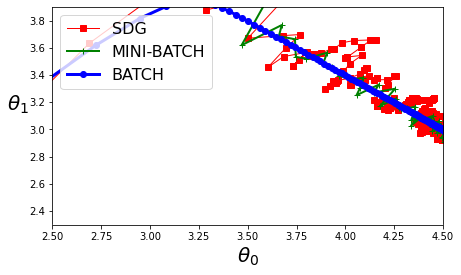

In [34]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="SDG")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="MINI-BATCH")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="BATCH")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

# batch는 정확한 방향으로 가지만 SDG는 요동치면서 간다.

In [ ]:
plt